# LINEAR_REGRESSION

# 1).imprting the necessaries libraries such as sklearn , numpy, pandas and matplotlib

In [1]:
#from sklearn import preprocessing
#import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# 2).Reading the datasets.

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\NEC\BeijingPM20100101_20151231.csv ")
df.head()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


In [3]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'season', 'PM_Dongsi',
       'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP', 'HUMI',
       'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')

# 3).Droping the columns having NaN values.

In [4]:
df1 = df.drop(columns=['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post','cbwd',],axis=1)
df1.head()

,No,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,-21.0,43.0,1021.0,-11.0,1.79,0.0,0.0
1,2,2010,1,1,1,4,-21.0,47.0,1020.0,-12.0,4.92,0.0,0.0
2,3,2010,1,1,2,4,-21.0,43.0,1019.0,-11.0,6.71,0.0,0.0
3,4,2010,1,1,3,4,-21.0,55.0,1019.0,-14.0,9.84,0.0,0.0
4,5,2010,1,1,4,4,-20.0,51.0,1018.0,-12.0,12.97,0.0,0.0


# 4).Droping all the attributes except HUMI and TEMP on which I have to apply linear rgression considering HUMI as feature and TEMP as Target vriable.

In [5]:
df2=df1.drop(['No','year','month','day','hour','season','DEWP','PRES','Iws','precipitation','Iprec'],axis = 1)
df2.head()
#df2 = df1.drop(['PM_Dongsi','PM_Dongsihuan','PM_Nongzhanguan','PM_US Post'],axis=1)
#df2


,HUMI,TEMP
0,43.0,-11.0
1,47.0,-12.0
2,43.0,-11.0
3,55.0,-14.0
4,51.0,-12.0


In [6]:
df2.shape

(52584, 2)

# 5).Droping all the na values from HUMI and TEMP

In [7]:
df3=df2.dropna(axis = 0)
df3.head()

,HUMI,TEMP
0,43.0,-11.0
1,47.0,-12.0
2,43.0,-11.0
3,55.0,-14.0
4,51.0,-12.0


# 6).Checking whether the na values have been droped or not using .sum()

In [8]:
df3.isnull().sum()

HUMI    0
TEMP    0
dtype: int64

# 7).Normalising the datasets.

In [9]:
df4 = (df3-df3.min())/(df3.max()-df3.min())
df4.head()

,HUMI,TEMP
0,0.418367,0.131148
1,0.459184,0.114754
2,0.418367,0.131148
3,0.540816,0.081967
4,0.500000,0.114754


# 7).Selecting the dataitems which only contins numbers in the dataitems i.e.,there should be no any categorical data.

In [10]:
df_n= df4.select_dtypes(include = [np.number])
df_l = df_n.loc[:,['HUMI','TEMP']]
df_l.head()

,HUMI,TEMP
0,0.418367,0.131148
1,0.459184,0.114754
2,0.418367,0.131148
3,0.540816,0.081967
4,0.500000,0.114754


In [11]:
df_l.shape

(52245, 2)

# 8).Plotting the graph for checking how the data's are distributed in the datasets.In this case we can see that the data are normally distribued.

C:\Users\dell\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


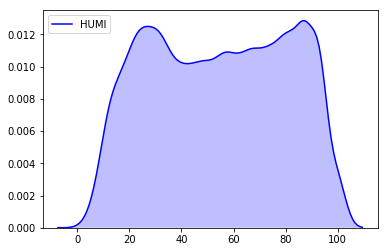

In [12]:
import seaborn as sns
sns.kdeplot(df3['HUMI'], shade =True, c= 'b')

In [13]:
x = np.array(df_l['HUMI']).reshape(52245,1)
y = np.array(df_l['TEMP']).reshape(52245,1)
x.shape
y.shape

(52245, 1)

# 9).importing the train_test_split library from the sklearn.model_selection for the training and testing of the data.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

# 10).Splitting the dataset in the ratio 80:20..i.e.s 80 for the training and 20 for the testing.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(41796, 1) (41796, 1)
(10449, 1) (10449, 1)


# 11).importing the LinearRegression library from sklearn.learn_model.

In [22]:
from sklearn.linear_model import LinearRegression

# 12).Fitting the datasets using reg.fit functions.Here X is HUMI and Y is TEMP.

In [23]:
reg = LinearRegression()
reg.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 13).Finding the coefficient of the data using reg.coef_

In [17]:
reg.coef_

array([[0.05603937]])

# 14).Finding the intercept of the data i.e., slope of the line using reg.intercept_

In [18]:
reg.intercept_

array([0.48812245])

# 15).Predicting the value for the X_test and storing predicted array in varible Y_Prediction.

In [19]:
Y_prediction = reg.predict(X_test)
Y_prediction

array([[0.53958718],
       [0.52929424],
       [0.52529142],
       ...,
       [0.52929424],
       [0.54073084],
       [0.50127455]])

# 16).Printing the list of actual dataset and the obtained predicted dataset.

In [20]:
a = pd.DataFrame({"actual":list(Y_test),"prediction":list(Y_prediction)})
a.head()

,actual,prediction
0,[0.3114754098360656],[0.5395871833359678]
1,[0.2786885245901639],[0.5292942371297983]
2,[0.5901639344262295],[0.5252914247162879]
3,[0.6065573770491803],[0.5184294605788415]
4,[0.5409836065573771],[0.4966999074769281]


# 17).Checking the mean square error,mean absolute error

In [74]:
from sklearn import metrics
print(metrics.mean_squared_error(Y_test,Y_prediction))

0.03943122724762981


In [76]:
print(metrics.mean_absolute_error(Y_test,Y_prediction))

0.17191886031519954


In [77]:
print(np.sqrt(metrics.mean_absolute_error(Y_test,Y_prediction)))

0.41463099295059885
